# Churner 
Churneris generally defined as a customer who stops using a product or service for a given period of time.

This notebook is to do the data analysis and predictions on the churn.csv file.

The first step in the Data Preprocessing is to import the libraries, load the data and do some Exploratory Data Analysis (EDA).

In [1]:
import os

In [2]:
import pandas as pd

In [3]:
from pandas import DataFrame

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

In [7]:
plt.style.use("seaborn-dark")
sns.set_context("talk", font_scale=0.6)
from scipy.stats.contingency import chi2_contingency
from scipy.stats import normaltest, shapiro

In [8]:
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

import matplotlib

matplotlib.rcParams.update(
    {"lines.linewidth": 1, "patch.facecolor": "#ebe3df", "axes.facecolor": "#ebe3df"}
)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [10]:
df=pd.read_csv("C:/Users/angel/Downloads/Task 20-Bank Turnover Dataset.csv")

 Exploratory Data Analysis

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [13]:
df.shape

(10000, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
df=df.drop_duplicates()

In [17]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Displaying summary statistics of the numeric columns

In [18]:
styled_df = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Computing the number of exited and not exited clients:

In [19]:
exited = len(df[df['Exited']==1]['Exited'])
not_exited = len(df[df['Exited']==0]['Exited'])
exited_perc = round(exited/len(df)*100,1)
not_exited_perc =round(not_exited/len(df)*100,1)

In [20]:
print('Number of clients that have exited the program: {} ({}%)'.format(exited, exited_perc))
print('Number of clients that haven\'t exited the program: {} ({}%)'.format(not_exited, not_exited_perc))

Number of clients that have exited the program: 2037 (20.4%)
Number of clients that haven't exited the program: 7963 (79.6%)


So, around of 20% of the clients exited the bank, while around 80% stayed. As the goal here is to identify which of the customers are at higher risk to discontinue their services with the bank, we are dealing with a classification problem.

A important point to take into consideration here is that we are dealing with an imbalanced dataset.

In [21]:
country=list(df['Geography'].unique())
print(country)

['France', 'Spain', 'Germany']


In [22]:
gender = list(df['Gender'].unique())
print(gender)

['Female', 'Male']


In [23]:
#Create a Exited string variable to create the plots
df['Exited_str']=df['Exited']
df['Exited_str']=df['Exited_str'].map({1: 'Exited',0: 'Stayed'})

In [24]:
gender_count = df['Gender'].value_counts()
gender_pct= gender_count / len(df.index)

gender = pd.concat([gender_count, round(gender_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
gender

,count,pct
Male,5457,0.55
Female,4543,0.45


In [25]:
geo_count = df['Geography'].value_counts()
geo_pct= geo_count / len(df.index)

geo = pd.concat([geo_count, round(geo_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
geo


,count,pct
France,5014,0.50
Germany,2509,0.25
Spain,2477,0.25



In the dataset, there are more men (55%) than women (45%), and it has only 3 different countries: France, Spain, and Germany. Where 50% of the customers are from France and 25% are from Germany, and the other group are from Spain.

Now, let's just check the relationship between the features and the outcome ('Exited').

In [26]:
def count_by_group(data,feature,target):
    df = data.groupby([feature,target])[target].agg(['count'])
    temp=data.groupby([feature])[target].agg(['count'])
    df['pct']=100*df.div(temp,level=feature).reset_index()['count'].values
    return df.reset_index()

In [27]:
count_by_group(df, feature = 'Gender', target ='Exited')

,Gender,Exited,count,pct
0,Female,0,3404,74.928461
1,Female,1,1139,25.071539
2,Male,0,4559,83.544072
3,Male,1,898,16.455928


In [28]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

def sankey(left, right, colorDict=None, figureName='Sankey Diagram'):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title=figureName)
    
    sankey = Sankey(ax=ax)
    
    for l, r in zip(left, right):
        color = colorDict.get(l, 'blue')
        sankey.add(flows=[1, -1], labels=[l, r], orientations=[0, 0], facecolor=color)
    
    diagrams = sankey.finish()
    
    plt.show()

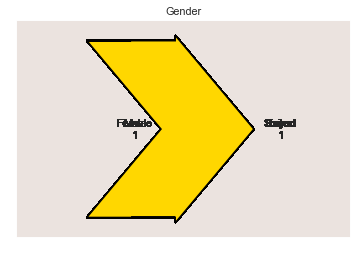

In [29]:
pd.options.display.max_rows=8
colorDict ={
    'Exited':'#f71b1b',
    'Stayed':'grey',
    'Female':'#FFD700',
    'Male':'#8E388E'
}
sankey(
    df['Gender'], df['Exited_str'],colorDict=colorDict,figureName="Gender"
)

In [30]:
NumOfProducts_count = dataset['NumOfProducts'].value_counts()
NumOfProducts_pct= NumOfProducts_count / len(dataset.index)

NumOfProducts = pd.concat([NumOfProducts_count, round(NumOfProducts_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
NumOfProducts



NameError: name 'dataset' is not defined